# Lucas Behrend y Martina Cenedese

# Importaciones

In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, confusion_matrix

# Lectura del dataset

1. Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

In [2]:
data = pd.read_csv('toyota.csv')      #Se lee el dataset y se pasa a una variable

# Analisis exploratorio

2. Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

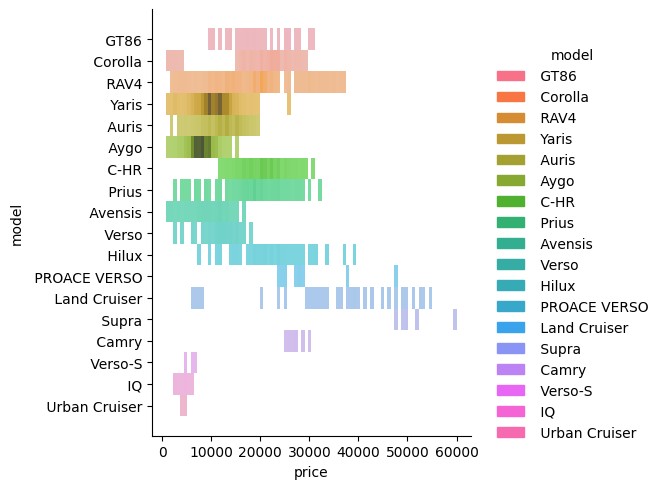

In [3]:
model_price = data[["model","price"]]     #Se crea una variable con las columnas 'model' y 'price'

sns.displot(      #Grafico de tipo displot con la libreria seaborn, mostrando en el eje x el precio y en el eje y el modelo.
    data=model_price, x="price", y="model", hue="model", kind="hist",
)


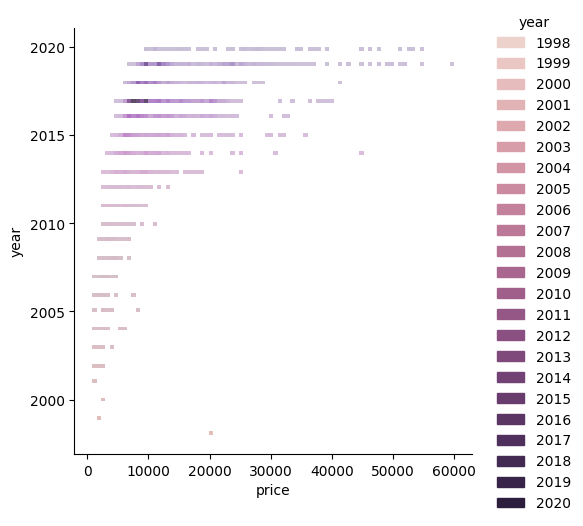

In [4]:
year_price = data[["year","price"]]     #Se crea una variable con las columnas 'year' y 'price'

sns.displot(       #Grafico de tipo displot con la libreria seaborn, mostrando en el eje x el precio y en el eje y el año.
    data=year_price, x="price", y="year", hue="year", kind="hist",
)

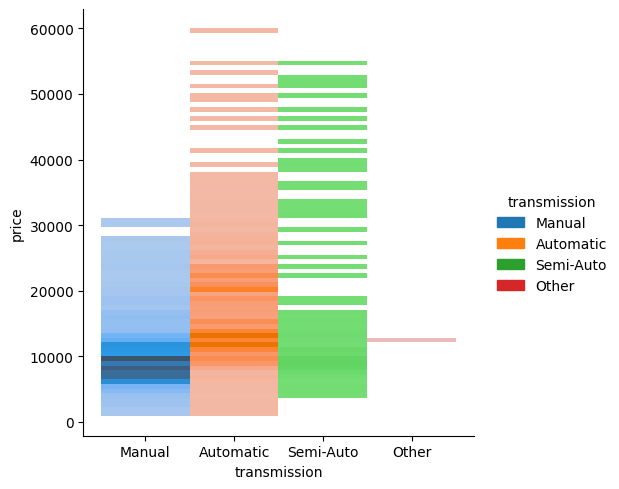

In [5]:
transmission_price = data[["transmission","price"]]       #Se crea una variable con las columnas 'transmission' y 'price'

sns.displot(      #Grafico de tipo displot con la libreria seaborn, mostrando en el eje x la transmision y en el eje y el precio.

    data=transmission_price, x="transmission", y="price", hue="transmission",
)

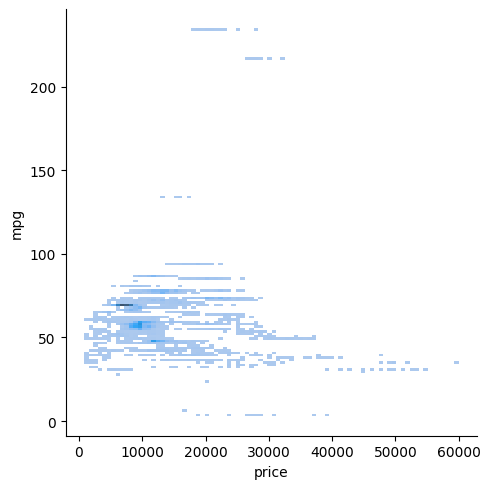

In [6]:
mpg_price = data[["price","mpg"]]     #Se crea una variable con las columnas 'mpg' y 'price'

sns.displot(    #Grafico de tipo displot con la libreria seaborn, mostrando en el eje x el precio y en el eje y las millas por galón.
    data=mpg_price, x="price", y="mpg",
)

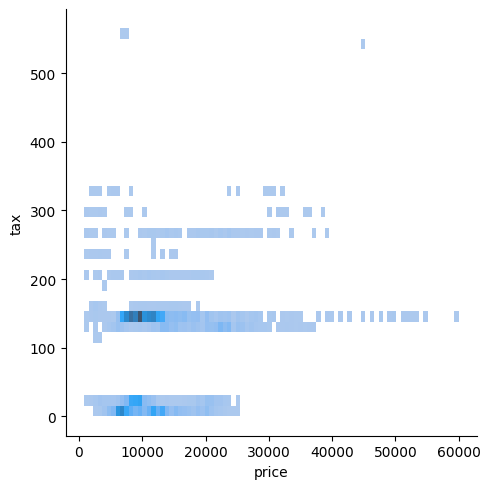

In [7]:
tax_price = data[["price","tax"]]   #Se crea una variable con las columnas 'tax' y 'price'

sns.displot(        #Grafico de tipo displot con la libreria seaborn, mostrando en el eje x el precio y en el eje y el los impuestos.
    data=tax_price, x="price", y="tax",
)

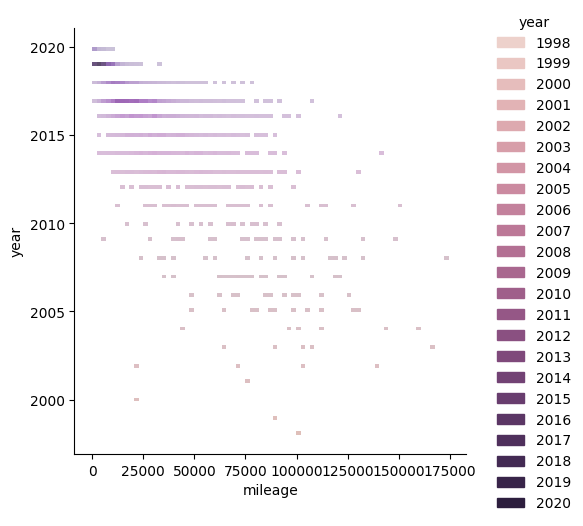

In [8]:
year_mileage = data[["year","mileage"]]     #Se crea una variable con las columnas 'year' y 'mileage'

sns.displot(       #Grafico de tipo displot con la libreria seaborn, mostrando en el eje x el mllaje y en el eje y el año.
    data=year_mileage, x="mileage", y="year", hue="year", kind="hist",
)

# Preparación de datos para los modelos de regresión

3. Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.

Observamos que las columnas 'mpg' y 'tax' no tienen mucho peso en el precio, probamos sacarlo pero la precisión del modelo no cambia.

In [9]:
#Usando la funcion LabelEncoder, se convierten los atributos categóricos a numéricos
#Usando .fit se ajusta el encoder a las labels dadas. Y .transform efectúa la transformación.
#Las transformaciones se aplican en la misma columna y se modifica el dataframe original
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(data['model'])
data['model'] = labelEncoder.transform(data['model'])

labelEncoder.fit(data['transmission'])
data['transmission'] = labelEncoder.transform(data['transmission'])

labelEncoder.fit(data['fuelType'])
data['fuelType'] = labelEncoder.transform(data['fuelType'])



4. Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

In [10]:
scaler = MinMaxScaler()   #Usando la función MinMaxScaler, se escalan las columnas con valores muy altos a valores entre 0 y 1, pero manteniendo la proporción.
columnsToNormalize = ['price', 'mileage', 'tax', 'mpg', 'engineSize']     #Columnas a escalar
data[columnsToNormalize] = scaler.fit_transform(data[columnsToNormalize])     #Se fitea el scaler y se transforman los valores
print(data)

      model  year     price  transmission   mileage  fuelType       tax  \
0         6  2016  0.256150             1  0.138100         3  0.469027   
1         6  2017  0.256066             1  0.106716         3  0.256637   
2         6  2015  0.222301             1  0.157479         3  0.469027   
3         6  2017  0.306839             1  0.084476         3  0.265487   
4         6  2017  0.281478             1  0.208019         3  0.256637   
...     ...   ...       ...           ...       ...       ...       ...   
6733      8  2011  0.078620             0  0.171990         3  0.035398   
6734     14  2011  0.069913             1  0.207273         3  0.221239   
6735     14  2012  0.070082             1  0.263724         0  0.221239   
6736     14  2011  0.053174             1  0.348005         3  0.221239   
6737     14  2011  0.061628             1  0.258725         3  0.221239   

           mpg  engineSize  
0     0.143842    0.444444  
1     0.143842    0.444444  
2     0.1438

In [11]:
#Se separan los datos en features y labels para luego separarlos también en entrenamiento y testeo
features = data.drop(['price'], axis = 1)
labels = data['price']
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, labels, test_size=0.25, random_state=42)

# Modelo regresión lineal

In [12]:
modelRegresionLineal = LinearRegression()     #Define el modelo como modelo de regresión lineal
scores = cross_val_score(modelRegresionLineal, trainFeatures, trainLabels, cv=10)     #Realiza validación cruzada con 10 pliegues para evaluar el rendimiento del modelo en los datos de entrenamiento.
modelRegresionLineal.fit(trainFeatures, trainLabels)      #Ajusta el modelo a los datos de entrenamiento
testPredictions = modelRegresionLineal.predict(testFeatures)      #Realiza las predicciones con las features de testeo
mse = mean_squared_error(testLabels, testPredictions)       #Calcula el Mean Squared Error a partir de las predicciones y las labe
r2 = r2_score(testLabels, testPredictions)
mae = mean_absolute_error(testLabels, testPredictions)

print("Puntajes en la validación cruzada:", scores)
print("Puntaje promedio en la validación cruzada:", scores.mean())
print("Desviación estándar de los puntajes en la validación cruzada:", scores.std())
print("MSE en el conjunto de prueba:", mse)
print("R^2 en el conjunto de prueba:", r2)
print("MAE en el conjunto de prueba:", mae)


Puntajes en la validación cruzada: [0.76714299 0.77534768 0.77891202 0.79321704 0.79360179 0.77592539
 0.77091189 0.75530173 0.77894848 0.76405863]
Puntaje promedio en la validación cruzada: 0.7753367629713384
Desviación estándar de los puntajes en la validación cruzada: 0.01137895069837948
MSE en el conjunto de prueba: 0.002440613238004456
R^2 en el conjunto de prueba: 0.7918814342494341
MAE en el conjunto de prueba: 0.03534776623952801


5. Para el atributo numérico a predecir seleccionado:


*   Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.

*   Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.

**Atributo númerico a predecir: Precio**


# Modelo Decision Tree Regressor

In [13]:
modelDecisionTreeRegressor = DecisionTreeRegressor(max_depth = 15,min_samples_leaf = 4)  # Define el modelo como Decision Tree Regressor y se le pasan como hiper parametros la maxima cantidad de decisiones y la cantidad minima de hojas de cada rama final
mseScores = cross_val_score(modelDecisionTreeRegressor, trainFeatures, trainLabels, cv=6, scoring='neg_mean_squared_error') # Aplica validacion cruzada y calcula el score con "neg_mean_squared_error"
mseScores = -mseScores
msePromedio = scores.mean()
r2Scores = cross_val_score(modelDecisionTreeRegressor, trainFeatures, trainLabels, cv=6, scoring='r2') #  Aplica validacion cruzada y calcula el score con "r2"
r2Scores = r2Scores.mean()
print("R^2 promedio en validación cruzada:", r2Scores)
print("MSE promedio en validación cruzada:", msePromedio)
modelDecisionTreeRegressor.fit(trainFeatures, trainLabels)

predicciones_arbol = modelDecisionTreeRegressor.predict(testFeatures)
mse = mean_squared_error(testLabels, predicciones_arbol)
r2 = r2_score(testLabels, predicciones_arbol)
mae = mean_absolute_error(testLabels, predicciones_arbol)
print("R^2 promedio en prueba:", r2)
print("MSE promedio en prueba:", mse)
print("MAE promedio en prueba:", mae)

R^2 promedio en validación cruzada: 0.9459394551954885
MSE promedio en validación cruzada: 0.7753367629713384
R^2 promedio en prueba: 0.9571669049632419
MSE promedio en prueba: 0.0005023051086019253
MAE promedio en prueba: 0.014936133866466986


# Respuestas modelos de regresión

Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

**Las formas que tenemos de evaluar los resultados de cada árbol de decision son utilizando el mean squared error, el mean absolute error y el r squared. El MSE calcula el cuadrado de los promedios de errores de predicción, así se notan más los errores más grandes. El MAE mide el promedio de los errores absolutos de predicción y el r2 que tan bien se ajusta el modelo a los datos. El mejor árbol se elige según estos valores, el que de un mejor resultado es el que se elige. De esta misma manera se pueden comparar los resultados de los modelos de regresión lineal y de árbol de decisión, comparando estos valores, se puede evaluar cual es el mejor modelo.**

# Preparación de datos para los modelos de clasificación

6. Para el atributo categórico a predecir seleccionado



1.   Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.
2.   Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.

**Atributo categórico a predecir: Anterior o igual, o mayor a 2016**


In [14]:
data['After2016'] = data['year'].apply(lambda año: 1 if año > 2016 else 0)  #Crea una nueva columna para la clasificacion binaria donde se aplica 1 si es más nuevo que 2016 y 0 si no
data.drop(columns = 'year', inplace = True)   #Elimina la columna 'year' para que tenga sentido la predicción

features = data.drop(['After2016'], axis = 1)
labels = data['After2016']
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, labels, test_size=0.25, random_state=42)

# Modelo Regresión Logística

In [15]:
modelLogisticRegression = LogisticRegression(random_state=42, solver='lbfgs', max_iter=150)   #Defino el modelo como Modelo Regresion Logistica. "solver='lbfgs', max_iter=150 soluciona una advertencia"
scores = cross_val_score(modelLogisticRegression, trainFeatures, trainLabels, cv=5)
modelLogisticRegression.fit(trainFeatures, trainLabels)
testPredictions = modelLogisticRegression.predict(testFeatures)
accuracy = accuracy_score(testLabels, testPredictions) #Calcula la precisión del modelo con los datos de testeo
f1 = f1_score(testLabels, testPredictions) #Calcula el f1 score del modelo con los datos de testeo
confusion = confusion_matrix(testLabels, testPredictions) #Crea una matriz de confusión con las predicciones y los datos originales
print("Puntajes en la validación cruzada:", scores)
print("Puntaje promedio en la validación cruzada:", scores.mean())
print("Desviación estándar de los puntajes en la validación cruzada:", scores.std())
print("Precisión en el conjunto de prueba:", accuracy)
print("F1 score en el conjunto de prueba:", f1)
print("Matriz de confusión en el conjunto de prueba:", confusion)

Puntajes en la validación cruzada: [0.83580613 0.85262117 0.83580613 0.84752475 0.85742574]
Puntaje promedio en la validación cruzada: 0.8458367854589612
Desviación estándar de los puntajes en la validación cruzada: 0.008768226623780346
Precisión en el conjunto de prueba: 0.8587537091988131
F1 score en el conjunto de prueba: 0.8914233576642336
Matriz de confusión en el conjunto de prueba: [[470 123]
 [115 977]]


# Modelo árbol de decisión de clasificación

In [16]:
#Decision Tree Classifier
modelDecissionTreeClassiffier = DecisionTreeClassifier(random_state=42, min_samples_leaf = 3, max_features = "log2", max_leaf_nodes = 49)
scores = cross_val_score(modelDecissionTreeClassiffier, trainFeatures, trainLabels, cv=5)
modelDecissionTreeClassiffier.fit(trainFeatures, trainLabels)
testPredictions = modelDecissionTreeClassiffier.predict(testFeatures)
accuracy = accuracy_score(testLabels, testPredictions)
f1 = f1_score(testLabels, testPredictions)
confusion = confusion_matrix(testLabels, testPredictions)
print("Puntajes en la validación cruzada:", scores)
print("Puntaje promedio en la validación cruzada:", scores.mean())
print("Desviación estándar de los puntajes en la validación cruzada:", scores.std())
print("Precisión en el conjunto de prueba:", accuracy)
print("F1 score en el conjunto de prueba:", f1)
print("Matriz de confusión en el conjunto de prueba:", confusion)

Puntajes en la validación cruzada: [0.8793274  0.87339268 0.86053412 0.86633663 0.9039604 ]
Puntaje promedio en la validación cruzada: 0.876710246692325
Desviación estándar de los puntajes en la validación cruzada: 0.015031334879254489
Precisión en el conjunto de prueba: 0.8985163204747775
F1 score en el conjunto de prueba: 0.9206496519721578
Matriz de confusión en el conjunto de prueba: [[522  71]
 [100 992]]


# Respuestas modelos de clasificación

Responder las mismas preguntas que en el punto 5 para este caso.

**Las formas que tenemos de evaluar los resultados de cada árbol son midiendo la precisión, el puntaje f1, y la matriz de confusión. La precisión mide cuantas predicciones son correctas con respecto a la cantidad de predicciones. El puntaje f1 es una combinación entre accuracy y recall, que mide la cantidad de positivos predecidos con respecto a los verdaderos positivos. Ambas cuanto más cerca de 1 es el resultado mejor. También se puede evaluar con una matriz de confusión, que muestra las predicciones del modelo en relación a los verdaderos resultados. El mejor árbol se elige observando estos números y cambiando hiperparametros para ver si mejora. Los resultados de el árbol de decisión y del modelo de regresión logística se pueden comparar midiendo los valores previamente mencionados y comparando cuáles son mayores.**

Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?
Las ventajas de kfold son que es proporciona una buena validación del programa, utilizando todos los datos de validación. Las desventajas son que puede costar computacionalmente y tardar en correr si el numero de folds es muy grande. Además, puede no ser adecuado si los datos no son equilibrados. En nuestro caso, es el que mejor funcionó.
Otro metodo de validacion cruzada es leave one out cross validation. La ventaja de este es que tiene un costo muy bajo en cuanto a datos de validación, ya que solo se valida con un X por iteración, entonces se puede usar si los datos son pocos o desequilibrados. Lo malo es que puede tardar mucho en correr ya que debe recorrer y validar el modelo la misma cantidad de veces que de datos hay. En nuestro caso, no lo pudimos implementar ya que devolvía "NaN".

# Conclusión

8. Responder las mismas preguntas que en el punto 5 para este caso.

En este trabajo pudimos observar distintos modelos predictivos, la preparación de datos y la evaluación de los modelos. Estos modelos fueron de regresión lineal y un árbol de decision regresor para la predicción continua y una regresión logística y un árbol de decisión de clasificación para la clasificación binaria. Los métodos de evaluación que usamos fueron MAE, MSE, R2, f1 score, accuracy y matriz de confusión. A partir de estos, se pueden ver los resultados y precisión de nuestros modelos. En nuestro caso, los árboles de decisión y usando kfold, fueron los que mejor predijeron los atributos.